# Остовные деревья

> Остовное дерево графа $G$ — ациклический связный подграф данного связного неориентированного графа $G$, в который входят все его вершины.

> Минимальное остовное дерево графа $G$ — остовное дерево графа, обладащее минимальным суммарным весом ребер.

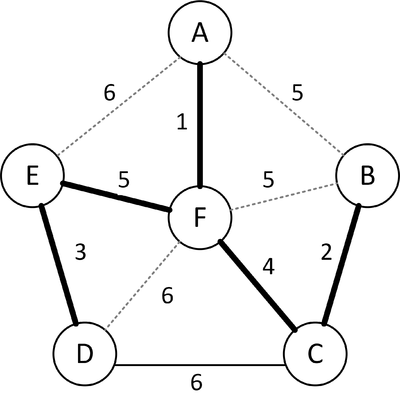

# Алгоритм Прима (Prim algorithm)
Алгоритм Прима — алгоритм поиска минимального остовного дерева во взвешенном неориентированном связном графе.

>Пусть $G'$ подграф некоторого минимального остовного дерева графа $G$. Ребро $(u, v)\notin G'$ называется **безопасным**, если при добавлении его в подграф $G'$ полученный граф $G' \cup {(u, v)}$ также является подграфом некоторого минимального остовного дерева графа $G$.

>**Разрез (англ. cut)** неориентированного графа $G=(V,E)$ - разбиение множества вершин $V$ на два непересекающихся подмножества: $S$ и $T=V∖S$ Обозначается как $⟨S,T⟩$.

> Ребро $(u,v)\in E$ **пересекает (англ. crosses)** разрез $⟨S,T⟩$, если один из его концов принадлежит множеству $S$, а другой — множеству $T$.


### Лемма о безопасном ребре
Рассмотрим связный неориентированный взвешенный граф $G=(V,E)$ с весовой функцией $w:E\rightarrow R$. Пусть $G′=(V,E′)$ — подграф некоторого минимального остовного дерева $G$, $⟨S,T⟩$ — разрез $G$, такой, что ни одно ребро из $E′$ не пересекает разрез, а $(u,v)$ — ребро минимального веса среди всех ребер, пересекающих разрез $⟨S,T⟩$. Тогда ребро $e=(u,v)$ является безопасным для $G′$.

**Доказательство:**


Достроим $E′$ до некоторого минимального остовного дерева, обозначим его $T_{min}$. Если ребро $e\in T_{min}$, то лемма доказана, поэтому рассмотрим случай, когда ребро $e\notin T_{min}$. Рассмотрим путь в $T_{min}$ от вершины $u$ до вершины $v$. Так как эти вершины принадлежат разным долям разреза, то хотя бы одно ребро пути пересекает разрез, назовем его $e′$. По условию леммы $w(e)\le w(e′)$. Заменим ребро $e′$ в $T_{min}$ на ребро $e$. Полученное дерево также является минимальным остовным деревом графа $G$, поскольку все вершины $G$ по-прежнему связаны и вес дерева не увеличился. Следовательно $E′\cup{e}$ можно дополнить до минимального остовного дерева в графе $G$, то есть ребро $e$ — безопасное.
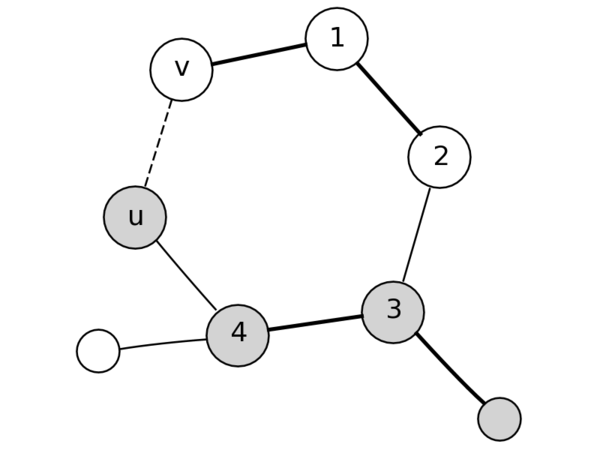

# Реализация алогртима

Будем последовательно строить поддерево $T$ ответа в графе $G$, поддерживая приоритетную очередь $Q$ из вершин $G∖T$, в которой ключом для вершины $v$ является $$\min\limits_{u\in V(T),\ (u,v) \in E(G)}w((u,v))$$ — вес минимального ребра из вершин $T$ в вершины $G∖T$. 

Также для каждой вершины в очереди будем хранить $p(v)$ — вершину $u$, на которой достигается минимум значения ключа. Дерево $T$ поддерживается неявно, и его ребра — это пары $(v,p(v))$, где $v\in G∖{r}∖Q$, а $r$ — корень $T$. Изначально $T$ пусто и значения ключей у всех вершин равны $+\infty$. Выберём произвольную вершину $r$ и присвоим её ключу значение $0$. На каждом шаге будем извлекать минимальную вершину $v$ из приоритетной очереди и релаксировать все ребра $(u,v)$, такие что $u\in Q$, выполняя при этом операцию понижения приоритета (ключа) над очередью и обновление $p(v)$. Ребро $(v,p(v))$ при этом добавляется к ответу.


Сложность алгоритма - $O(V^{2})$
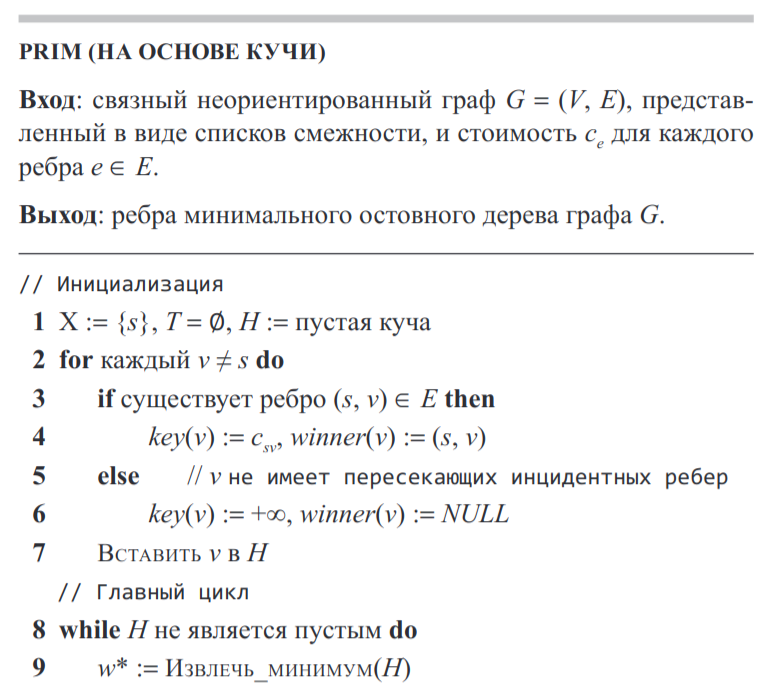
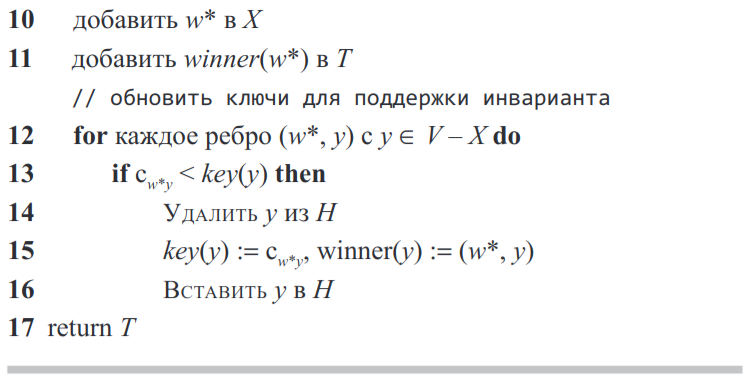

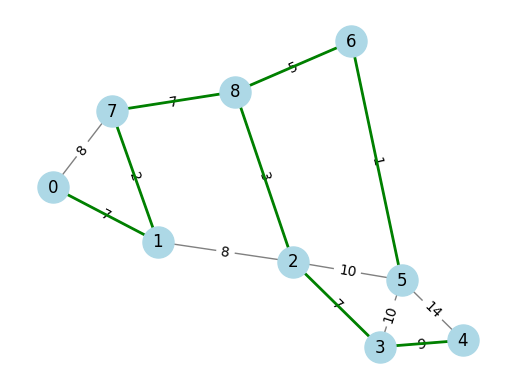

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [
        (0, 1, {"weight": 7}),
        (0, 7, {"weight": 8}),
        (1, 7, {"weight": 2}),
        (1, 2, {"weight": 8}),
        (2, 8, {"weight": 3}),
        (2, 5, {"weight": 10}),
        (2, 3, {"weight": 7}),
        (3, 4, {"weight": 9}),
        (3, 5, {"weight": 10}),
        (4, 5, {"weight": 14}),
        (5, 6, {"weight": 1}),
        (6, 8, {"weight": 5}),
        (7, 8, {"weight": 7}),
    ]
)

T = nx.minimum_spanning_tree(G, weight='weight', algorithm='prim', ignore_nan=False)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
)
nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()

In [32]:
INF = 10**10
G = [[0, 9, 75, 0, 0],
     [9, 0, 95, 19, 42],
     [75, 95, 0, 51, 66],
     [0, 19, 51, 0, 31],
     [0, 42, 66, 31, 0]]

V = len(G)
selected = [0, 0, 0, 0, 0]
no_edge = 0
selected[0] = True
print("Edge : Weight\n")
while (no_edge < V - 1):
    minimum = INF
    x = 0
    y = 0
    for i in range(V):
        if selected[i]:
            for j in range(V):
                if ((not selected[j]) and G[i][j]):
                    if minimum > G[i][j]:
                        minimum = G[i][j]
                        x = i
                        y = j
    print(str(x) + "-" + str(y) + ":" + str(G[x][y]))
    selected[y] = True
    no_edge += 1

Edge : Weight

0-1:9
1-3:19
3-4:31
3-2:51


# Алгоритм Краскала (Kruskal algorithm)
Алгоритм Краскала — алгоритм поиска минимального остовного дерева во взвешенном неориентированном связном графе.

Будем последовательно строить подграф $F$ графа $G$ ("растущий лес"), пытаясь на каждом шаге достроить $F$ до некоторого MST. Начнем с того, что включим в $F$ все вершины графа $G$. Теперь будем обходить множество $E(G)$ в порядке неубывания весов ребер. Если очередное ребро $e$ соединяет вершины одной компоненты связности $F$, то добавление его в остов приведет к возникновению цикла в этой компоненте связности. В таком случае, очевидно, $e$ не может быть включено в $F$. Иначе $e$ соединяет разные компоненты связности $F$, тогда существует $⟨S,T⟩$ разрез такой, что одна из компонент связности составляет одну его часть, а оставшаяся часть графа — вторую. Тогда $e$ — минимальное ребро, пересекающее этот разрез. Значит, из леммы о безопасном ребре следует, что $e$ является безопасным, поэтому добавим это ребро в $F$. На последнем шаге ребро соединит две оставшиеся компоненты связности, полученный подграф будет минимальным остовным деревом графа $G$. Для проверки возможности добавления ребра используется система непересекающихся множеств.

Сложность алгоритма - $O(E  \log{V})$

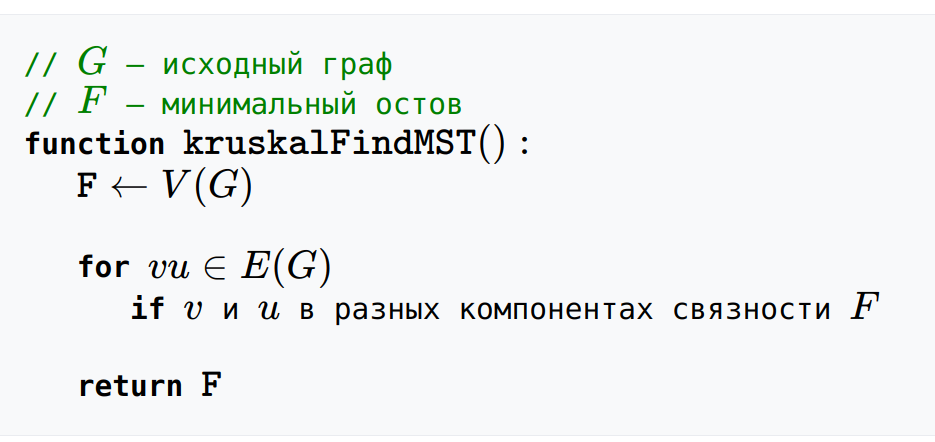

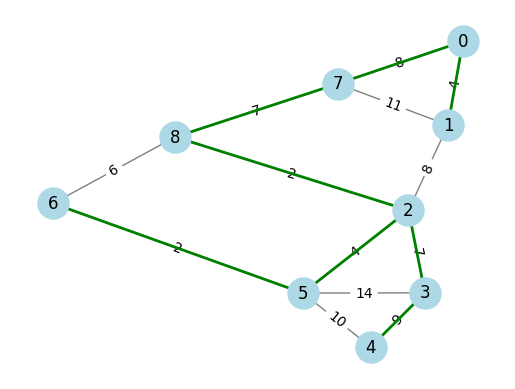

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [
        (0, 1, {"weight": 4}),
        (0, 7, {"weight": 8}),
        (1, 7, {"weight": 11}),
        (1, 2, {"weight": 8}),
        (2, 8, {"weight": 2}),
        (2, 5, {"weight": 4}),
        (2, 3, {"weight": 7}),
        (3, 4, {"weight": 9}),
        (3, 5, {"weight": 14}),
        (4, 5, {"weight": 10}),
        (5, 6, {"weight": 2}),
        (6, 8, {"weight": 6}),
        (7, 8, {"weight": 7}),
    ]
)

T = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal', ignore_nan=False)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
)
nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()

In [46]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    def kruskal_algo(self):
        result = []
        i, e = 0, 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        for u, v, weight in result:
            print("%d - %d: %d" % (u, v, weight))


g = Graph(6)
g.add_edge(0, 1, 4)
g.add_edge(0, 2, 4)
g.add_edge(1, 2, 2)
g.add_edge(1, 0, 4)
g.add_edge(2, 0, 4)
g.add_edge(2, 1, 2)
g.add_edge(2, 3, 3)
g.add_edge(2, 5, 2)
g.add_edge(2, 4, 4)
g.add_edge(3, 2, 3)
g.add_edge(3, 4, 3)
g.add_edge(4, 2, 4)
g.add_edge(4, 3, 3)
g.add_edge(5, 2, 2)
g.add_edge(5, 4, 3)
g.kruskal_algo()

1 - 2: 2
2 - 5: 2
2 - 3: 3
3 - 4: 3
0 - 1: 4


|                                                               Prim’s Algorithm                                                              |                                                        Kruskal’s Algorithm                                                        |
|:-------------------------------------------------------------------------------------------------------------------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------:|
|                                  It starts to build the Minimum Spanning Tree from any vertex in the graph.                                 |                 It starts to build the Minimum Spanning Tree from the vertex carrying minimum weight in the graph.                |
|                                    It traverses one node more than one time to get the minimum distance.                                    |                                                  It traverses one node only once.                                                 |
| Prim’s algorithm has a time complexity of O(V2), V being the number of vertices and can be improved up to O(E log V) using Fibonacci heaps. |                        Kruskal’s algorithm’s time complexity is O(E log V), V being the number of vertices.                       |
|                           Prim’s algorithm gives connected component as well as it works only on connected graph.                           | Kruskal’s algorithm can generate forest(disconnected components) at any instant as well as it can work on disconnected components |
|                                                Prim’s algorithm runs faster in dense graphs.                                                |                                         Kruskal’s algorithm runs faster in sparse graphs.                                         |
|                                    It generates the minimum spanning tree starting from the root vertex.                                    |                           It generates the minimum spanning tree starting from the least weighted edge.                           |
|      Applications of prim’s algorithm are Travelling Salesman Problem, Network for roads and Rail tracks connecting all the cities etc.     |                               Applications of Kruskal algorithm are LAN connection, TV Network etc.                               |
|                                                Prim’s algorithm prefer list data structures.                                                |                                          Kruskal’s algorithm prefer heap data structures.                                         |   |

# Задачи

1. Дан словарь различных слов и доска размером M x L, где в каждой ячейке есть один символ. Найдите все возможные слова из словаря, которые могут быть образованы последовательностью соседних символов на доске. Разрешено перемещение к любой из 8 соседних ячеек.

    Примечание:

    При формировании слова мы можем переместиться в любую из 8 соседних ячеек. Ячейка может быть использована только один раз в одном слове.

    Формат входных данных

    На вход программе в первой строке подаётся число слов в словаре N. В словаре минимум одно слово. В следующей строке передаётся словарь. В последующей строке два числа M и L - размер доски M x L и далее расположение букв на доске в виде {{буквы 1-й строки},{ буквы 2-й строки },{и т. д.}}.

    Формат выходных данных

    Вывести слова, которые можно образовать в отсортированном порядке в одной строке через пробел.

    Примеры

    Ввод:

    4 \
    GEEKS FOR QUIZ GO \
    3 3 \
    G I Z \
    U E K \
    Q S E

    Вывод:

    GEEKS QUIZ

2. Реализуйте алгоритм Прима и алгоритм Краскала и сравните их время работы на одних и тех же входных данных (порядка 10-20 тестов). Определите алгоритмическую сложность этих алгоритмов.

3. Дан связный неориентированный взвешенный граф без петель и кратных ребер, состоящий из n вершин и m ребер. Для каждого ребра графа (u, v) найдите вес такого остовного дерева, что это ребро (u, v) входит в него, и при этом вес этого остовного дерева минимален. Весом остовного дерева называется сумма весов ребер, входящих в остовное дерево.

    Отобразите граф и минимальное остовное дерево.

    Формат входных данных

    В первой строке записаны два целых числа n и m (1 ≤ n ≤ 2·105, n - 1 ≤ m ≤ 2·105) — количество вершин и ребер в графе.

    В каждой из следующих m строк записаны три целых числа ui, vi, wi (1 ≤ ui, vi ≤ n, ui ≠ vi, 1 ≤ wi ≤ 109) — вершины графа, соединенные i-м ребром, и вес этого ребра.

     Формат выходных данных


    Выведите m строк: i-я строка должна содержать минимальный вес такого остовного дерева, содержащего i-ое ребро.

    Ребра нумеруются от 1 до m в порядке их появления во входных данных.

     Примеры

    Ввод:

    5 7 \
    1 2 3 \
    1 3 1 \
    1 4 5 \
    2 3 2 \
    2 5 3 \
    3 4 2 \
    4 5 4

    Вывод:

    9 \
    8 \
    11 \
    8 \
    8 \
    8 \
    9

4. Правитель Графландии решил провести реформу административных округов в своём государстве. Новые окружные центры правитель выбрал, вам остаётся всего лишь распределить остальные города по округам.

    При этом правителю хочется, чтобы расстояние от города до окружного центра этого города не превышало расстояний от данного города до других окружных центров. Требуется вывести минимальную сумму расстояний от города до его окружного центра.

    Формат входных данных

    На вход программе в первой строке подаётся несколько (не менее трёх) чисел через пробел: N M CA CB ... , где

     - 2 ≤ N ≤ 1000 - число городов в государстве;

     - 1 ≤ M ≤ 100000 - число дорог между городами;

     - Ci - номера городов, которые правитель выбрал окружными центрами.

    В следующих M строках задаются дороги, по три числа в каждой строке - номера соединенных городов и длина дороги.

    Города нумеруются с нуля.

    Формат выходных данных

    Вывести минимальную сумму расстояний от города до его окружного центра. Если для города не достижим ни один из окружных центров, то этот город в расчёте расстояний не учитывается.

    Примеры

    Ввод:

    4 3 0 1 \
    0 1 34 \
    2 1 7 \
    3 2 85

    Вывод:

    99



# Бонус
Напишите программу, которая будет содержать реализацию структуры данных для совокупности непересекающихся подмножеств (disjoint sets) и обрабатывать запросы таких видов:

RESET n — создать новую серию подмножеств: множество из одного только элемента 0, из одного только элемента 1, и так до множества из одного только элемента n–1 включительно. Если структура уже содержала какую-то другую совокупность непересекающихся подмножеств, вся соответствующая информация утрачивается. На стандартный выход (экран) при этом следует вывести два слова через пробел «RESET DONE».

JOIN j k — объединить подмножества, которым принадлежат элемент j и элемент k. Если элементы и так принадлежали одному подмножеству, вывести на стандартный выход (экран) слово «ALREADY», после него через пробелы те же числа j и k в том же порядке. Если элементы до сих пор принадлежали разным подмножествам, то действие происходит только с данными в памяти, на экран ничего не выводится.

CHECK j k — проверить, одному ли подмножеству принадлежат элемент j и элемент k; вывести на стандартный выход (экран) слово «YES» (если одному) или слово «NO» (если разным).

Формат входных данных

Во входных данных содержится последовательность запросов RESET, JOIN и CHECK — каждый в отдельной строке, согласно вышеописанному формату. Гарантированно, что первая строка содержит запрос RESET, а общее количество запросов RESET не превышает 5. Общее количество всех запросов не превышает 200000. Значение n в каждом запросе RESET не превышает 100000. В каждом запросе JOIN и в каждом запросе CHECK оба числа будут в диапазоне от 0 до n–1, где n — параметр последнего выполненного запроса RESET.

Формат выходных данных

Для запросов RESET, CHECK и тех запросов JOIN, где элементы и так принадлежат одному подмножеству, выводить на стандартный выход (экран) соответствующий результат (в отдельной строке).

Примечание

Ответы «NO» даются на запросы «CHECK 2 11» и «CHECK 9 1», ответ «ALREADY 4 1» — на второй из запросов «JOIN 4 1» (10-я строка), «YES» — на «CHECK 5 10».

Примеры

Ввод:

RESET 15 \
JOIN 14 10 \
JOIN 13 8 \
JOIN 0 9 \
JOIN 8 3 \
JOIN 4 1 \
JOIN 10 5 \
JOIN 8 4 \
CHECK 2 11 \
JOIN 4 1 \
JOIN 2 6 \
CHECK 9 1 \
JOIN 6 5 \
CHECK 10 5 \

Вывод:

RESET DONE \
NO \
ALREADY 4 1 \
NO \
YES